# Predicting car prices: KNNs 

This project idea was provided by Dataquest, with the dataset is located on the UCI Machine Learning Repository.

**Dataquest link:** (https://app.dataquest.io/m/155/guided-project%3A-predicting-car-prices/1/introduction-to-the-data-set). 

**UCI link:** (https://archive.ics.uci.edu/ml/datasets/automobile).

The dataset contains attribute information for vehicles, ranging from vehicle characteristics to insurance ratings. The full description of the dataset can be found in the aforementioned link.

__Task:__ Use the *K-nearest-neighbors regression* algorithm to predict the vehicle price, as this task attempts to predict a continuous value. This will include the following:
1. Setting up the data
- Exploratory data analysis
- Data Cleaning
- Univariate models to assess each feature
- Multivariate models to assess the best combination of features
- Conclusion

Let's begin!

## 0. Setting up the data

Begin by importing all the relevant modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.options.display.max_columns = 99

From the UCI link, we are told that there are 205 instances and 26 attributes. Simply put, this means that there are 205 rows and 26 columns in the data. Additionally, we are told that there is categorical, integer and real data. 

Let's explore this.

In [2]:
cars = pd.read_csv('imports-85.data')

In [3]:
cars

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
cars.shape

(204, 26)

Right away, we can see that our column names do not make sense. In fact, Python used our first row of data as the column headers, leaving us with 204 rows now. To rectify this, we need to specify the column names when reading in the data with Pandas. Luckily, the UCI link provides us with the name and details of each attribute. We can use these names to specify our column names. 

In [5]:
attributes = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
              'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
              'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 
              'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=attributes)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 1. Exploratory data analysis

It is clear that we have a combination of categorical, integer and continuous data. Let's explore each of the categorical columns in a bit more detail. 

**Disclaimer:** I am by no means an expert on cars, but I will do my best to explain the categories that do make sense to me.

- **Symboling** 

Symboling is used to assess the associated risk factor with the car. A higher value means that there is greater risk in the car (probably due to performance of the vehicle and safety features), while a lower value means that there is less risk.



In [6]:
cars['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

- **Make** 

For example, the make of the car immediately creates a perception of value. For example, Japanese cars (Toyota, Nissan, Mazda) tend to be cheaper than German cars (Audi, BMW, Mercedes-Benz). Additionally, luxury car brands (Porsche and Jaguar) tend to be even more expensive, while super car brands (Ferrari and Lamborghini) are typically the most expensive cars.

In [7]:
cars['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

- **Fuel type**

The fuel type determines how the car is powered. In the dataset, we have gas and diesel. Gas engines are more common and tend to provide increased performance to a vehicle, when compared to diesel. Diesel engines were initially used to for larger trucks, due to the increased torque that is generated in a diesel engine. However, as diesel engines also provide better fuel consumption for a vehicle, they have become increasingly popular in passenger vehicles.

In [8]:
cars['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

- **Aspiration**

Standard and turbo aspiration is closely linked to the performance of a vehicle, especially the power output/horsepower and acceleration.

In [9]:
cars['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

- **Number of doors**

Cars typically have two or four doors (maybe even five, depending on how the trunk/boot is classified). Four door vehicles tend to be more practical. Two door vehicles usually imply sporty vehicles, but it could also mean that the vehicle is a smaller model where only two doors can fit.

In [10]:
cars['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

- **Body style**

The body style of a vehicle may have an effect on the price, due to the overall asthetic nature of the car. Convertible cars usually cost more, due to the mechanisms used to move the roof, as well as the sporty nature that is associated with the body style. Sedans are considered a good normal, while hatchbacks are seen as smaller cars. 

In [11]:
cars['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

- **Drive wheels**

Cars are able to move by powering either the front and/or rear wheels. However, there are cars that have 4 wheel drive, where power is sent to all four wheels. These additional capabilities result in increased costs for the manufacturer - costs that are ultimately passed to the consumer.

In [12]:
cars['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

- **Engine location**

The engine of a vehicle is heavy and is normally located in the front. However, sports cars tend to have mid or rear engines. Not only does this look cooler, it also assists in the overall weight distribution of the vehicle and affects the performance of a car, especially in tight corners.

In [13]:
cars['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

- **Number of cylinders**

The number of cylinders (and pistons) typically link to the overall size of the engine. The function is to transfer the force generated by expanding gas in the engine to the wheels. The higher the number of cylinders, the greater the force generated by the engine.

In [14]:
cars['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

- **Engine type, number of cylinders and fuel system**

That's as far as my knowledge of vehicles go.

In [15]:
cars['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [16]:
cars['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

### Now what?

For the KNN regression algorithm, we will only look at continuous values. Sure, it is possible to create dummy variables for the categorical data (ie. create additional binary columns), but that is outside the scope of this project. Remember, the purpose of this project is to assess KNN model performance with univariate and multivariate data. Also, many of the columns that we explored earlier do have a direct link to continuous values that we will analyze, so the categories will be "somewhat" factored in.

Therefore, we will only analyze the continuous data and drop the columns discussed above, along with a few other columns.

# 2. Data cleaning

In [17]:
continuous_cols = ['normalized-losses', 
                    'wheel-base',
                    'length',
                    'width',
                    'height',
                    'curb-weight',
                    'engine-size',
                    'bore', 
                    'stroke',
                    'compression-rate',
                    'horsepower',
                    'peak-rpm',
                    'city-mpg',
                    'highway-mpg',
                    'price']
cars = cars[continuous_cols]

In [18]:
cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


Looking at the head of our reduced dataframe, we can see that there are undesirable values (the first 3 rows of normalized-losses == '?') in our data. You may have also noticed the '?' data entry when we assessed the number of doors on a vehicle. 

We will convert the entry to a NaN.

In [19]:
cars = cars.replace('?', np.nan)
cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


We are expecting continuous data throughout the dataframe, as we already dropped all the other columns. Let's check to make sure that is the case, by viewing the datatypes for each row.

In [20]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    object 
 8   stroke             201 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    object 
 11  peak-rpm           203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


We can see that there are three different data types. While the data is numeric, it is cast as a string in some cases. See the example below to make sure.

In [21]:
cars['bore'][0]

'3.47'

In [22]:
type(cars['bore'][0])

str

We can rectify this by casting each column as a float.

In [23]:
cars = cars.astype('float')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


Now that all the data types are floats, we can continue.

If we recall what we are trying to achieve, we want to predict the car prices using the various attributes. As there are 4 instances where the price is not known, we will drop those rows, as we will be unable to check how well our prediction is.

In [24]:
cars = cars.dropna(subset=['price'])

Even though we were told that there was missing data in the dataset, we should always check to make sure. The amount of missing data will guide us on what approach, be it dropping the column as a whole, filling empty values with the mean/median etc.

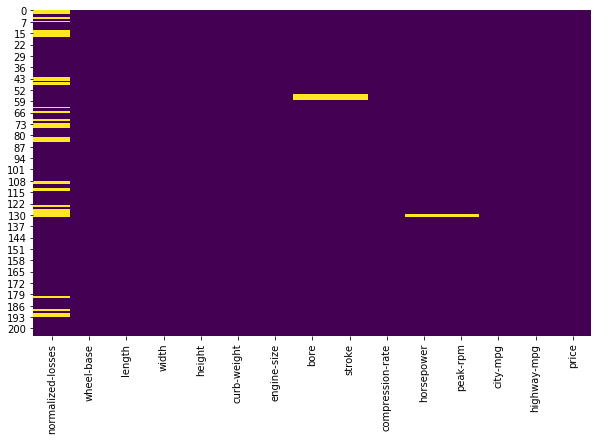

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(cars.isnull(), cmap='viridis', cbar=False)

In [26]:
cars['normalized-losses'].isnull().sum()/len(cars)

0.18407960199004975

We can see that most of the columns have only a few missing data points. We will use the mean of the column to fill in the missing data. Looking at the normalized-losses column, we can see that there 18.4% of the data is missing. We could go ahead and drop this column, but we don't know how much of an impact it has on the price of car. Therefore, we will keep the column and fill in the missing values with the mean of column.

In [27]:
cars = cars.fillna(cars.mean())
cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

We can see that there are no more missing values within the dataset.

Now we need to normalize the values between 0 and 1. This normalization is important when dealing with a wide range of data. It is important that the price column is not normalized, or else we will struggle to do a proper prediction.

In [28]:
price = cars['price']
cars = (cars - cars.min())/(cars.max() - cars.min())
cars['price'] = price

In [29]:
cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


# 3. Univariate models to assess each feature

First, we will define a function to split the each column into training and testing data. After that, we will build and test the model by assessing the various metrics common in regression problems (ie. mean absolute error, mean square error, root mean square error).

We will start off by using the default k value of 5.

In [30]:
def knn_train_test(col,df):
    
    X = df[[col]]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
    
    model = KNeighborsRegressor()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test,predictions)
    mse = mean_squared_error(y_test,predictions)
    rmse = mse**0.5
    
    return rmse

In [31]:
rmse_results = {}
train_cols = cars.columns.drop('price')

for col in train_cols:
    rmse = knn_train_test(col, cars)
    rmse_results[col] = rmse

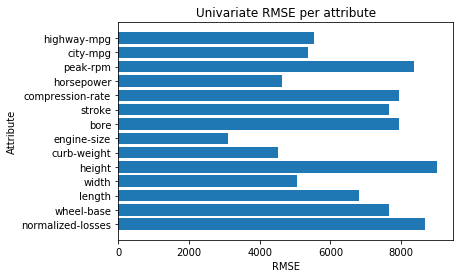

{'normalized-losses': 8664.12096550585,
 'wheel-base': 7662.781647871145,
 'length': 6818.496086237257,
 'width': 5062.623181516948,
 'height': 9016.189257654036,
 'curb-weight': 4522.070719714405,
 'engine-size': 3109.511125352107,
 'bore': 7943.114977775655,
 'stroke': 7656.9908266462135,
 'compression-rate': 7926.505898524536,
 'horsepower': 4624.373523401243,
 'peak-rpm': 8360.13337716178,
 'city-mpg': 5357.336309012983,
 'highway-mpg': 5542.316919312569}

In [32]:
plt.barh(list(rmse_results.keys()),list(rmse_results.values()))
plt.xlabel('RMSE')
plt.ylabel('Attribute')
plt.title('Univariate RMSE per attribute')
plt.show()

rmse_results

By modelling each attribute as a univariate model, we can see the 'best' features used to predict the price of a car (given the training parameters), given the k of 5. The top four features yielding the lowest RMSE are:

- Engine size
- Curb-weight
- Horsepower and 
- Width. 

We now want to explore how the RMSE will vary for each feature, with a change in k value. This process is known as **hyper-parametization**. This will help verify the best features over a number of k values, as opposed to just one.

In [33]:
def knn_train_test(col,df):
    
    X = df[[col]]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
    
    rmse_values = {}
    for k in range(1,11):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        mae = mean_absolute_error(y_test,predictions)
        mse = mean_squared_error(y_test,predictions)
        rmse = mse**0.5
        rmse_values[k] = rmse
    return rmse_values

In [34]:
rmse_results = {}

for col in train_cols:
    rmse = knn_train_test(col, cars)
    rmse_results[col] = rmse

Text(0.5, 1.0, 'Hyper-parametization of RMSE')

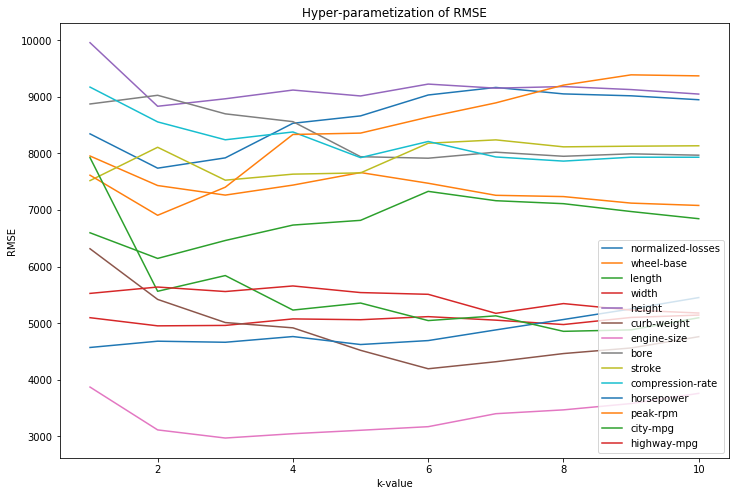

In [35]:
plt.figure(figsize=(12,8))
for i,j in rmse_results.items():
    plt.plot(list(j.keys()), list(j.values()))
    
plt.legend(rmse_results.keys())
plt.xlabel("k-value")
plt.ylabel("RMSE")
plt.title('Hyper-parametization of RMSE')

We can determine the mean of each attribute quite easily, to determine the best features over the 10 different k values. This will remove some bias from simply using k as 5.

In [36]:
rmse_results_df = pd.DataFrame(rmse_results)

In [37]:
rmse_results_df.mean().sort_values()

engine-size          3350.740999
curb-weight          4850.023405
horsepower           4866.007986
width                5055.179153
highway-mpg          5437.931593
city-mpg             5494.233235
length               6819.144762
wheel-base           7393.591398
stroke               7925.319747
compression-rate     8216.257135
bore                 8296.207890
peak-rpm             8412.905279
normalized-losses    8642.832138
height               9163.614548
dtype: float64

What do the metrics mean? Well, as we are looking at the RMSE, we can interpret the results as follows. The RMSE is the standard deviation, which describes the spread around the mean.

In [38]:
sorted_features = list(rmse_results_df.mean().sort_values().index)

We can see that the order of features for lowest RMSE is slightly different to just using k as 5. 

- Engine size
- Curb weight
- Horsepower
- Width

Through this analysis, we can confidently assess the strongest features (up to a k value of 10). Let's see if we can reduce the RMSE by creating a multivariate model.

# 4. Multivariate models to assess the best combination of features

Now we will look at training our model with a combination of features. We previously determined and sorted the best features to reduce the overall RMSE, up to a k value of 10. For simplicity, we will now use that same order to determine the optimal number of features and k value for our model.

In [39]:
def knn_train_test(col,df):
    
    X = df[col]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
    
    k_rmses = {}
    for k in range(1,10):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        mae = mean_absolute_error(y_test,predictions)
        mse = mean_squared_error(y_test,predictions)
        rmse = mse**0.5
        k_rmses[k] = rmse
    return k_rmses

In [40]:
best_features_results = {}
for nr_best_features in range(1,6):
    cols = sorted_features[:nr_best_features]
    key = str(nr_best_features) + ' best features'
    best_features_results[key] = knn_train_test(cols,cars)

Text(0.5, 1.0, 'Hyper-parametization of RMSE with multiple features')

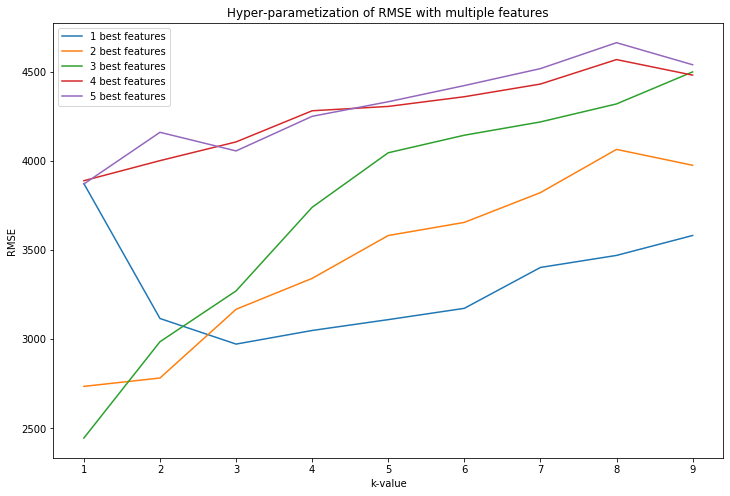

In [41]:
plt.figure(figsize=(12,8))
for i,j in best_features_results.items():
    plt.plot(list(j.keys()), list(j.values()))
    
plt.legend(best_features_results.keys())
plt.xlabel("k-value")
plt.ylabel("RMSE")
plt.title('Hyper-parametization of RMSE with multiple features')

In [42]:
best_features_results_df = pd.DataFrame(best_features_results)
best_features_results_df.mean().sort_values()

1 best features    3305.082886
2 best features    3458.255098
3 best features    3741.010006
4 best features    4269.491456
5 best features    4312.558217
dtype: float64

On average, we can see that using only one best feature yields the lowest RMSE. However, as we are searching for the optimal k value, we can see that the RMSE is even lower, given the following:

- Use 2 or 3 of the best features
- Use a low k value

# 5. Conclusion

We have explored the KNN regression algorithm for univariate and multivariate data. 
- Multiple features with a low k value decreases the RMSE of the model.
- As we increase the k value, we increase the RMSE of the multivariate model. 
- We have seen the balance between bias and variance.
    - Bias: For the univariate case, as we increase the k value, the RMSE decreases before increasing again after the optimal point.
    - Variance: For the multivariate cases, increase the number of features, we end up with weaker predictions in our model.
    
Just a thought - what if we were to create a multivariate, where each feature has an optimal k value? Would this result in a more accurate model? Would our accuracy improve if we used k-fold validation? 